### Ordinary differential equations (ODE; Numerical Recipes and P. Cordero notes)

#### 1) Verlet method

The Verlet method is especially suitable for solving Newton's equation when the force only depends on the position:

\begin{equation}
\frac{d^2\vec{r}}{dt^2} = \frac{\vec{F}(t, \vec{r})}{m}. \tag{1}
\label{eq1}
\end{equation}
Although it can be generalized to the case where there is a linear viscous force ($-c\vec{v}$), we will concentrate on the case where the force has not dependence on $\vec{v}$.

Equation \ref{eq1} is discretized directly:

We know that 
\begin{equation}
\vec{r}_{n+1}-\vec{r}_{n}=h\vec{v}_{n}+\frac{h^2}{2}\vec{a}_{n}+\frac{h^3}{3!}\vec{a}_{n}'+\frac{h^4}{4!}\vec{a}_{n}''+O(h^5), \textrm{ and} \tag{2}
\label{eq2}
\end{equation}
\begin{equation}
\vec{r}_{n-1}-\vec{r}_{n}=-h\vec{v}_{n}+\frac{h^2}{2}\vec{a}_{n}-\frac{h^3}{3!}\vec{a}_{n}'+\frac{h^4}{4!}\vec{a}_{n}''+O(h^5). \tag{3}
\label{eq3}
\end{equation}

Then 
\begin{equation}
\vec{r}_{n+1}-2\vec{r}_{n} + \vec{r}_{n-1} = h^2\vec{a}_{n} + O(h^4), \tag{4}
\label{eq4}
\end{equation}
which means that
\begin{equation}
\frac{\vec{r}_{n+1}-2\vec{r}_{n} + \vec{r}_{n-1}}{h^2} = \vec{a}_{n} + O(h^2). \tag{5}
\label{eq5}
\end{equation}

Therefore the Verlet method is:

\begin{equation}
\vec{r}_{n+1}= 2\vec{r}_{n} - \vec{r}_{n-1} + h^2\vec{a}_{n} + O(h^4). \tag{6}
\label{eq6}
\end{equation}

##### Considerations:

a) It requires first two steps as initial conditions; we can use RK to obtain 2nd step.

b) Even though the truncation error is small, its round off error can be significant since h^2 is used in each step. This problem can be reduced by using leapfrog.

#### 2) Leapfrog (or Verlet/Leapfrog)

The idea is that: 

1) even though strictly speaking we do not need to define the velocity, we define it so that calculating the recurrence relation does not involve calculating $h^2$ (avoiding round-off errors).

2) we define the velocity in half-integer times, in order to reduce truncation errors. 

Let us see how this works:

##### Recurrence relation for the position:

\begin{equation}
\vec{r}_{n+1}=\vec{r}_{n} + \vec{v}_{n}h + \vec{a}_{n}\frac{h^2}{2} + O(h^3). \tag{7}
\label{eq7}
\end{equation}
But
\begin{equation}
\vec{v}_{n+\frac{1}{2}}=\vec{v}_{n} + \vec{a}_{n}\frac{h}{2} + O(h^2). \tag{8}
\label{eq8}
\end{equation}
Thus
\begin{eqnarray}
\vec{r}_{n+1} & = & \vec{r}_{n} + \vec{v}_{n+\frac{1}{2}}h + O(h^3). \tag{9}
\label{eq9}
\end{eqnarray}

The recurrence relation given by Eq \ref{eq9} has the same truncation error as the one given by Eq \ref{eq7}, but it does not require evaluating $\vec{a}_n$.

##### Recurrence relation for the velocity:

\begin{equation}
\vec{v}_{n+\frac{1}{2}}=\vec{v}_{n-\frac{1}{2}} + \vec{a}_{n-\frac{1}{2}}h + \vec{a}'_{n-\frac{1}{2}}\frac{h^2}{2} + O(h^3). \tag{10}
\label{eq10}
\end{equation}
But
\begin{equation}
\vec{a}_{n}=\vec{a}_{n-\frac{1}{2}} + \vec{a}'_{n-\frac{1}{2}}\frac{h}{2} + O(h^2). \tag{11}
\label{eq11}
\end{equation}
Thus
\begin{eqnarray}
\vec{v}_{n+\frac{1}{2}} & = & \vec{v}_{n-\frac{1}{2}} + \vec{a}_nh + O(h^3). \tag{12}
\label{eq12}
\end{eqnarray}

#### 3) Verlet/Leapfrog is "symplectic"

For a smooth field of force acting on 4 particles (very close in phase space), one can show that the area in the figure is conserved:
\begin{eqnarray}
dA=dA' \,\,\,\textrm{ (Liouville's theorem)}\tag{13}
\label{eq13}
\end{eqnarray}

<img src="liouville.png" width="300">

It is important for numerical integration algorithms to respect this area conservation property. When the do, they are called "symplectic". We will show that this is the case for Verlet/Leapfrog.

Area conservation requires 

\begin{equation}
|\vec{\Delta}_{21} \times \vec{\Delta}_{41}|=|\vec{\Delta}_{21}' \times \vec{\Delta}_{41}'|,\tag{14}
\label{eq14}
\end{equation}
with
\begin{equation}
\vec{\Delta}_{21} \times \vec{\Delta}_{41}=(\hat{p}\times\hat{x})dpdx, \tag{15}
\label{eq15}
\end{equation}

In order to calculate $\vec{\Delta}_{21}' \times \vec{\Delta}_{41}'$, we need to map the positions in phase space. This is achieved assuming a mapping relation:
\begin{eqnarray}
x'(x, p) \textrm{ and } p'(x, p).
\end{eqnarray}

In that case, 
\begin{eqnarray}
\vec{\Delta}_{21}' & = & \Big(\hat{x}\frac{\partial x'}{\partial p} + \hat{p}\frac{\partial p'}{\partial p}\Big)dp\\
\vec{\Delta}_{41}' & = & \Big(\hat{x}\frac{\partial x'}{\partial x} + \hat{p}\frac{\partial p'}{\partial x}\Big)dx \tag{16}
\label{eq16}
\end{eqnarray}

Thus,
\begin{equation}
\vec{\Delta}_{21}' \times \vec{\Delta}_{41}' = (\hat{p}\times\hat{x})dpdx\Big(\frac{\partial x'}{\partial x}\frac{\partial p'}{\partial p}-\frac{\partial x'}{\partial p}\frac{\partial p'}{\partial x}\Big). \tag{17}
\label{eq17}
\end{equation}

The quantity in parenthesis is called the Jacobian $J$ of the transformation, and we will require $J=1$ in order for the mapping to preserve area. Let us check that this is the case for the Verlet/Leapfrog algorithm:

We will imagine that the mapping is the transformation of $r_n$ and $v_n$ into $r_{n+1}$ and $v_{n+1}$. For the position we will use Eq. \ref{}, which is equivalent to Eq. \ref{}:

\begin{equation}
\vec{r}_{n+1}=\vec{r}_{n} + \vec{v}_{n}h + \vec{a}_{n}\frac{h^2}{2} + O(h^3). \tag{18}
\label{eq18}
\end{equation}

For the velocity, the recurrence relation is:
\begin{eqnarray}
\vec{v}_{n+\frac{1}{2}} & = & \vec{v}_{n-\frac{1}{2}} + \vec{a}_nh + O(h^3)\\
\vec{v}_{n+1} - \frac{h}{2}a_{n+1} + \frac{(h/2)^2}{2}a'_{n+1} + O(h^3) & = & \vec{v}_{n} - \frac{h}{2}\vec{a}_{n} + \frac{(h/2)^2}{2}a'_{n} + O(h^3) + \vec{a}_nh + O(h^3)\\
\vec{v}_{n+1} + \frac{(h/2)^2}{2}a'_{n} + O(h^3) & = & \vec{v}_{n}+ \frac{h}{2}(a_{n}+a_{n+1}) + \frac{(h/2)^2}{2}a'_{n} + O(h^3)\\
\vec{v}_{n+1} & = & \vec{v}_{n}+ \frac{h}{2}(a_{n}+a_{n+1}) + O(h^3) \tag{19}
\label{eq19}
\end{eqnarray}

For the case of Eqs. \ref{eq18} and \ref{eq19},

\begin{eqnarray}
J & = & \Big(\frac{\partial r_{n+1}}{\partial r_n}\frac{\partial v_{n+1}}{\partial v_n}-\frac{\partial r_{n+1}}{\partial v_{n}}\frac{\partial v_{n+1}}{\partial r_{n}}\Big) & = & 1 \,\,\,\,(homework!) \tag{20}
\label{eq20}
\end{eqnarray}

Eq. \ref{eq20} implies that Verlet/Leapfrog is symplectic, which makes the evolution of the particles in phase space more stable, helping with energy conservation. Notice, however, that this does not mean that Verlet/Leapfrog conserves energy exactly.

#### 4) Angular momentum conservation

For central potentials, Verlet/Leapfrog does conserve angular momentum "exactly" (i.e., as much as what the truncation error allows it). This can be easily seen:

\begin{eqnarray}
\vec{l}_{n+1} & = & \vec{r}_{n+1} \times \vec{v}_{n+1} & = & (\vec{r}_{n} + h\vec{v}_{n} + \frac{h^2}{2}\vec{a}_{n})\times(\vec{v}_{n} + \frac{h}{2}(\vec{a}_{n}+\vec{a}_{n+1})) + O(h^3)\\
&&& = & \vec{r}_{n} \times \vec{v}_{n} + \vec{r}_{n}\times \frac{h}{2}(\vec{a}_{n} + \vec{a}_{n+1}) + \frac{h^2}{2}\vec{v}_{n} \times (\vec{a}_{n} + \vec{a}_{n+1}) + \frac{h^2}{2} \vec{a}_{n}\times \vec{v}_{n} + O(h^3)\\
&&& = & \vec{r}_{n} \times \vec{v}_{n} + \frac{h}{2}(\vec{r}_{n}+h\vec{v}_{n})\times \vec{a}_{n+1} + O(h^3)\\
&&& = & \vec{r}_{n} \times \vec{v}_{n} + \frac{h}{2}\vec{r}_{n+1}\times \vec{a}_{n+1} + O(h^3)\\
&&& = & \vec{r}_{n} \times \vec{v}_{n} + O(h^3)\\
&&& = & \vec{l}_{n} + O(h^3) \tag{21}
\label{eq21}
\end{eqnarray}

#### 5) Example: planetary motion

\begin{equation}
\frac{d^2\vec{r}}{dt^2} = -\frac{GM\vec{r}}{r^3}. \tag{22}
\label{eq22}
\end{equation}

Normalizing $r$ by $r_0$ and $t$ by $t_0$, Eq. \ref{eq22} becomes

\begin{equation}
\frac{d^2\hat{\vec{r}}}{d\hat{t}^2} = -\frac{\hat{\vec{r}}}{\hat{r}^3}\frac{GMt_0^2}{r_0^3}. \tag{23}
\label{eq23}
\end{equation}

Imposing that 
\begin{equation}
\frac{GMt_0^2}{r_0^3}=1, \tag{24}
\label{eq24}
\end{equation}

we get the equations

\begin{eqnarray}
\frac{d\hat{\vec{v}}}{d\hat{t}} & = & -\frac{\hat{\vec{r}}}{\hat{r}^3} \\
\frac{d\hat{\vec{r}}}{d\hat{t}} & = & \hat{\vec{v}}.
\end{eqnarray}


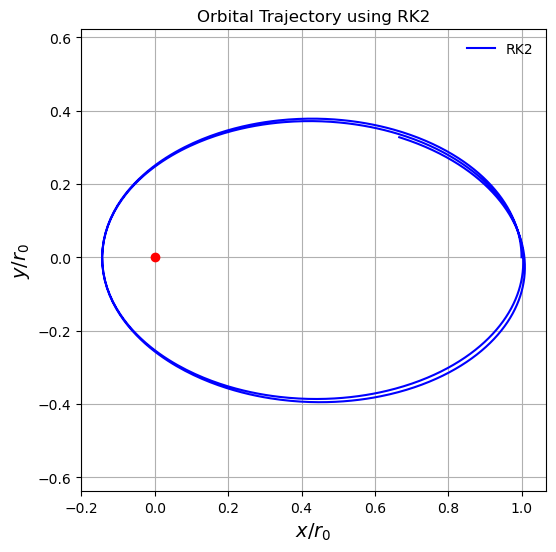

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes
L = 6.28
N = 1000
h = L / N

# Inicializamos arreglos
x = np.zeros(N + 1)
y = np.zeros(N + 1)
vx = np.zeros(N + 1)
vy = np.zeros(N + 1)
K_RK2 = np.zeros(N + 1)
U_RK2 = np.zeros(N + 1)
E_RK2 = np.zeros(N + 1)
t = np.linspace(0, L, N + 1)

# Condiciones iniciales
x[0], y[0] = 1.0, 0.0
vx[0], vy[0] = 0.0, .5

# Energias iniciales
r0_sq = x[0]**2 + y[0]**2
K_RK2[0] = 0.5 * (vx[0]**2 + vy[0]**2)
U_RK2[0] = -1.0 / np.sqrt(r0_sq)
E_RK2[0] = K_RK2[0] + U_RK2[0]

# implementacion de RK2
for i in range(N):
    r_sq = x[i]**2 + y[i]**2
    r_3_2 = r_sq ** 1.5

    # evaluamos k1
    ax1 = -x[i] / r_3_2
    ay1 = -y[i] / r_3_2
    k1vx = h * ax1
    k1vy = h * ay1
    k1x = h * vx[i]
    k1y = h * vy[i]

    # puntos medios
    x_half = x[i] + 0.5 * k1x
    y_half = y[i] + 0.5 * k1y
    vx_half = vx[i] + 0.5 * k1vx
    vy_half = vy[i] + 0.5 * k1vy

    r_half_sq = x_half**2 + y_half**2
    r_half_3_2 = r_half_sq ** 1.5

    # evaluamos k2
    ax2 = -x_half / r_half_3_2
    ay2 = -y_half / r_half_3_2
    k2vx = h * ax2
    k2vy = h * ay2
    k2x = h * vx_half
    k2y = h * vy_half

    # actualizamos posiciones y velocidades
    x[i+1] = x[i] + k2x
    y[i+1] = y[i] + k2y
    vx[i+1] = vx[i] + k2vx
    vy[i+1] = vy[i] + k2vy

    # actualizamos las energias
    v_sq = vx[i+1]**2 + vy[i+1]**2
    r_sq = x[i+1]**2 + y[i+1]**2
    K_RK2[i+1] = 0.5 * v_sq
    U_RK2[i+1] = -1.0 / np.sqrt(r_sq)
    E_RK2[i+1] = K_RK2[i+1] + U_RK2[i+1]

# graficamos la orbita
plt.figure(figsize=(6, 6))
plt.plot(x, y, color='blue', label='RK2')
plt.xlabel("$x/r_0$", fontsize=14)
plt.ylabel("$y/r_0$", fontsize=14)
plt.legend(loc='upper right', frameon=False)
plt.plot(0.0, 0.0, 'ro')  # Center of attraction
plt.axis('equal')
plt.title("Orbital Trajectory using RK2")
plt.grid(True)
plt.show()

(-0.9, -0.8)

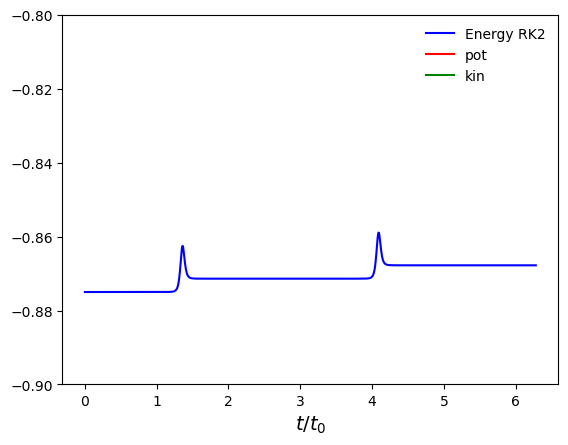

In [40]:
# chequeamos conservacion de energia
plt.plot(t,E_RK2,color='blue', label='Energy RK2')
plt.plot(t,U_RK2,color='red', label='pot')
plt.plot(t,K_RK2,color='green', label='kin')
plt.xlabel("$t/t_0$",fontsize=14)
plt.legend(loc='upper right', frameon=False)
plt.ylim(-.9,-0.8)

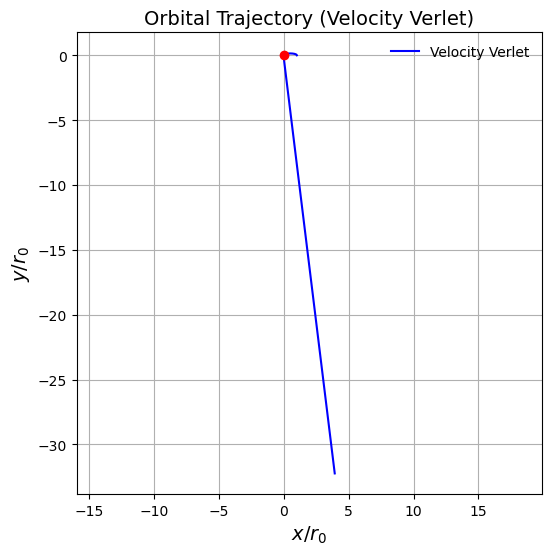

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Constants and simulation parameters
L = 6.28
N = 1000
h = L / N

# Initialize arrays
x = np.zeros(N + 1)
y = np.zeros(N + 1)
vx = np.zeros(N + 1)
vy = np.zeros(N + 1)
K_Ver = np.zeros(N + 1)
U_Ver = np.zeros(N + 1)
E_Ver = np.zeros(N + 1)
t = np.linspace(0, L, N + 1)

# Initial conditions
x[0], y[0] = 1.0, 0.0
vx[0], vy[0] = 0.0, .2

# Initial energy
r0_sq = x[0]**2 + y[0]**2
K_Ver[0] = 0.5 * (vx[0]**2 + vy[0]**2)
U_Ver[0] = -1.0 / np.sqrt(r0_sq)
E_Ver[0] = K_Ver[0] + U_Ver[0]

# Velocity Verlet integration loop
for i in range(N):
    # Compute acceleration at current step
    r_sq = x[i]**2 + y[i]**2
    r_3_2 = r_sq ** 1.5
    ax_i = -x[i] / r_3_2
    ay_i = -y[i] / r_3_2

    # Update positions
    x[i+1] = x[i] + h * vx[i] + 0.5 * h**2 * ax_i
    y[i+1] = y[i] + h * vy[i] + 0.5 * h**2 * ay_i

    # Compute acceleration at next step
    r_next_sq = x[i+1]**2 + y[i+1]**2
    r_next_3_2 = r_next_sq ** 1.5
    ax_next = -x[i+1] / r_next_3_2
    ay_next = -y[i+1] / r_next_3_2

    # Update velocities
    vx[i+1] = vx[i] + 0.5 * h * (ax_i + ax_next)
    vy[i+1] = vy[i] + 0.5 * h * (ay_i + ay_next)

    # Compute energy
    K_Ver[i+1] = 0.5 * (vx[i+1]**2 + vy[i+1]**2)
    U_Ver[i+1] = -1.0 / np.sqrt(r_next_sq)
    E_Ver[i+1] = K_Ver[i+1] + U_Ver[i+1]

# Plot trajectory
plt.figure(figsize=(6, 6))
plt.plot(x, y, color='blue', label='Velocity Verlet')
plt.plot(0.0, 0.0, 'ro')  # Central mass
plt.xlabel("$x/r_0$", fontsize=14)
plt.ylabel("$y/r_0$", fontsize=14)
plt.title("Orbital Trajectory (Velocity Verlet)", fontsize=14)
plt.legend(loc='upper right', frameon=False)
plt.axis('equal')
plt.grid(True)
plt.show()

(-0.9, -0.8)

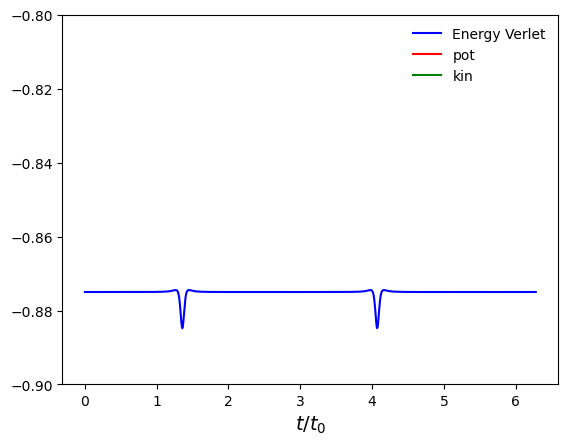

In [42]:
plt.plot(t,E_Ver,color='blue', label='Energy Verlet')
plt.plot(t,U_Ver,color='red', label='pot')
plt.plot(t,K_Ver,color='green', label='kin')
plt.xlabel("$t/t_0$",fontsize=14)
plt.legend(loc='upper right', frameon=False)
plt.ylim(-0.9,-.8)